In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [2]:
import cactas as C

/home/jiehyun.kim001/miniconda3/envs/O/lib/python3.9/site-packages/scipy/__init__.py:132: UserWarning: A NumPy version >=1.21.6 and <1.28.0 is required for this version of SciPy (detected version 1.21.0)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
import tensorflow as tf
gpu_available = tf.test.is_gpu_available()
gpu_available

2023-11-02 21:50:41.707374: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0


Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


2023-11-02 21:50:43.618945: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-02 21:50:43.619779: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2023-11-02 21:50:43.938339: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:47:00.0 name: A100-SXM4-40GB computeCapability: 8.0
coreClock: 1.41GHz coreCount: 108 deviceMemorySize: 39.59GiB deviceMemoryBandwidth: 1.41TiB/s
2023-11-02 21:50:43.940830: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 1 with properties: 
pciBusID: 0000:4e:00.0 name: A100-SXM4-40GB computeCapability: 8.0
coreClock: 1.41GHz coreCount: 108 deviceMemorySize: 3

True

In [4]:
DATAPATH='/raid/mpsych/CACTAS/DATA/ESUS'

In [5]:
images, labels = C.Helper.load_data(DATAPATH)

In [6]:
X_train, y_train, X_test, y_test = C.Helper.split_patients(images, labels)

In [7]:
X_train, y_train, X_test, y_test = C.Helper.normalization(DATAPATH, X_train, y_train, X_test, y_test)

In [8]:
slice_to_patient_mapping, last_key = C.Helper.map_and_key(y_train)

In [9]:
X_train, y_train, X_test, y_test = C.Helper.extract_slices(X_train, y_train, X_test, y_test)

(13256, 512, 512, 1) (13256, 512, 512, 1) (3510, 512, 512, 1) (3510, 512, 512, 1)


In [10]:
X_train, y_train = C.Helper.filter_slices(X_train, y_train)

(562, 512, 512, 1) (562, 512, 512, 1)


In [11]:
X_train_set = X_train[:last_key]
y_train_set = y_train[:last_key]
X_val = X_train[last_key:]
y_val = y_train[last_key:]

In [12]:
train_gen = C.Helper.augment_2(X_train_set, y_train_set)

-----------------------------------------
keras-unet init: TF version is >= 2.0.0 - using `tf.keras` instead of `Keras`
-----------------------------------------


In [13]:
sample_batch = next(train_gen)
xx, yy = sample_batch
print(xx.shape, yy.shape)

(2, 512, 512, 1) (2, 512, 512, 1)


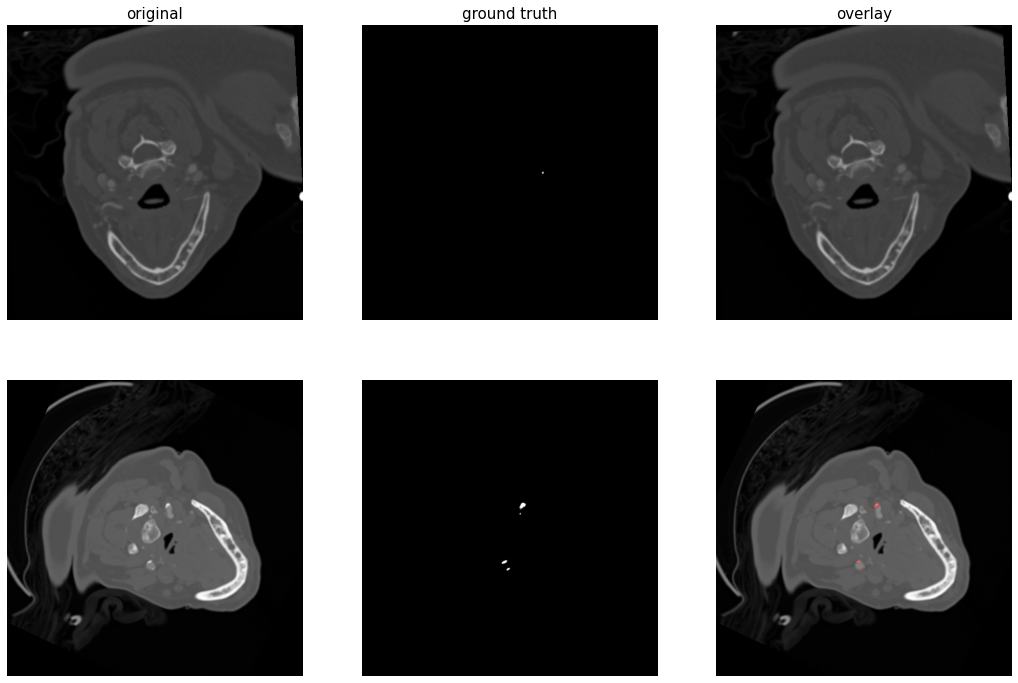

In [14]:
from keras_unet.utils import plot_imgs

plot_imgs(org_imgs=xx, mask_imgs=yy, nm_img_to_plot=2, figsize=6)

In [15]:
model = C.Helper.create_unet(X_train_set[0].shape)

2023-11-02 21:53:16.733939: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:47:00.0 name: A100-SXM4-40GB computeCapability: 8.0
coreClock: 1.41GHz coreCount: 108 deviceMemorySize: 39.59GiB deviceMemoryBandwidth: 1.41TiB/s
2023-11-02 21:53:16.736472: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 1 with properties: 
pciBusID: 0000:4e:00.0 name: A100-SXM4-40GB computeCapability: 8.0
coreClock: 1.41GHz coreCount: 108 deviceMemorySize: 39.59GiB deviceMemoryBandwidth: 1.41TiB/s
2023-11-02 21:53:16.746191: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1871] Adding visible gpu devices: 0, 1
2023-11-02 21:53:16.749118: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:47:00.0 name: A100-SXM4-40GB computeCapability: 8.0
coreClock: 1.41GHz coreCount: 108 deviceMemorySize: 39.59GiB deviceMemoryBandwidth: 1.41TiB/s
2023-11-02 21:53:16.751568: I tensorflow/core

In [16]:
model, history = C.Helper.train_unet(train_gen, X_train_set, y_train_set, X_val, y_val, model, steps_per_epoch=len(X_train) // 2,epochs=200)

2023-11-02 21:53:17.528275: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2023-11-02 21:53:17.548750: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 2245800000 Hz


Epoch 1/200


2023-11-02 21:53:18.877762: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudnn.so.8
2023-11-02 21:53:19.932591: I tensorflow/stream_executor/cuda/cuda_dnn.cc:359] Loaded cuDNN version 8201
2023-11-02 21:53:21.498047: W tensorflow/stream_executor/gpu/asm_compiler.cc:191] Falling back to the CUDA driver for PTX compilation; ptxas does not support CC 8.0
2023-11-02 21:53:21.498069: W tensorflow/stream_executor/gpu/asm_compiler.cc:194] Used ptxas at ptxas
2023-11-02 21:53:21.498917: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] Unimplemented: ptxas ptxas too old. Falling back to the driver to compile.
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.
2023-11-02 21:53:22.703510: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2023-11-02 21:53:24.033035: I tensorflow/stream_exec

202/202 [==============================] - 177s 592ms/step - loss: 0.0290 - iou: 0.0067 - iou_thresholded: 0.0174 - val_loss: 0.0020 - val_iou: 5.4172e-04 - val_iou_thresholded: 6.4323e-04
Epoch 2/200
202/202 [==============================] - 20s 101ms/step - loss: 0.0016 - iou: 0.0072 - iou_thresholded: 0.0168 - val_loss: 0.0020 - val_iou: 6.1729e-04 - val_iou_thresholded: 6.4323e-04
Epoch 3/200
202/202 [==============================] - 20s 100ms/step - loss: 0.0014 - iou: 0.0081 - iou_thresholded: 0.0170 - val_loss: 0.0016 - val_iou: 0.0040 - val_iou_thresholded: 6.4323e-04
Epoch 4/200
202/202 [==============================] - 20s 101ms/step - loss: 0.0013 - iou: 0.0103 - iou_thresholded: 0.0175 - val_loss: 0.0012 - val_iou: 0.0064 - val_iou_thresholded: 6.4323e-04
Epoch 5/200
202/202 [==============================] - 20s 100ms/step - loss: 0.0012 - iou: 0.0103 - iou_thresholded: 0.0176 - val_loss: 0.0014 - val_iou: 0.0054 - val_iou_thresholded: 6.4323e-04
Epoch 6/200
202/202 [==

202/202 [==============================] - 20s 100ms/step - loss: 4.5253e-04 - iou: 0.2042 - iou_thresholded: 0.2796 - val_loss: 5.2223e-04 - val_iou: 0.1747 - val_iou_thresholded: 0.3319
Epoch 43/200
202/202 [==============================] - 20s 100ms/step - loss: 5.2028e-04 - iou: 0.1764 - iou_thresholded: 0.2438 - val_loss: 7.1914e-04 - val_iou: 0.1232 - val_iou_thresholded: 0.0735
Epoch 44/200
202/202 [==============================] - 20s 100ms/step - loss: 4.7903e-04 - iou: 0.1834 - iou_thresholded: 0.2225 - val_loss: 4.1614e-04 - val_iou: 0.2639 - val_iou_thresholded: 0.3758
Epoch 45/200
202/202 [==============================] - 20s 100ms/step - loss: 5.8082e-04 - iou: 0.1514 - iou_thresholded: 0.1531 - val_loss: 9.3378e-04 - val_iou: 0.1253 - val_iou_thresholded: 0.3176
Epoch 46/200
202/202 [==============================] - 20s 101ms/step - loss: 5.6071e-04 - iou: 0.1425 - iou_thresholded: 0.1379 - val_loss: 4.1829e-04 - val_iou: 0.2132 - val_iou_thresholded: 0.1982
Epoch 47

Epoch 83/200
202/202 [==============================] - 20s 101ms/step - loss: 6.8869e-04 - iou: 0.0780 - iou_thresholded: 0.0848 - val_loss: 6.9576e-04 - val_iou: 0.1050 - val_iou_thresholded: 0.0827
Epoch 84/200
202/202 [==============================] - 20s 100ms/step - loss: 6.7790e-04 - iou: 0.0805 - iou_thresholded: 0.0921 - val_loss: 7.0810e-04 - val_iou: 0.1021 - val_iou_thresholded: 0.0623
Epoch 85/200
202/202 [==============================] - 20s 101ms/step - loss: 7.2220e-04 - iou: 0.0808 - iou_thresholded: 0.0831 - val_loss: 8.2792e-04 - val_iou: 0.1014 - val_iou_thresholded: 0.2096
Epoch 86/200
202/202 [==============================] - 20s 100ms/step - loss: 7.1817e-04 - iou: 0.0809 - iou_thresholded: 0.0894 - val_loss: 6.7156e-04 - val_iou: 0.1137 - val_iou_thresholded: 0.0823
Epoch 87/200
202/202 [==============================] - 20s 101ms/step - loss: 7.1163e-04 - iou: 0.0779 - iou_thresholded: 0.0826 - val_loss: 6.9109e-04 - val_iou: 0.1124 - val_iou_thresholded: 0.

Epoch 124/200
202/202 [==============================] - 20s 100ms/step - loss: 6.0090e-04 - iou: 0.1134 - iou_thresholded: 0.1505 - val_loss: 6.2298e-04 - val_iou: 0.1439 - val_iou_thresholded: 0.2102
Epoch 125/200
202/202 [==============================] - 20s 100ms/step - loss: 6.1861e-04 - iou: 0.1097 - iou_thresholded: 0.1481 - val_loss: 6.2183e-04 - val_iou: 0.1520 - val_iou_thresholded: 0.2407
Epoch 126/200
202/202 [==============================] - 20s 100ms/step - loss: 6.3414e-04 - iou: 0.1125 - iou_thresholded: 0.1484 - val_loss: 6.1285e-04 - val_iou: 0.1572 - val_iou_thresholded: 0.2516
Epoch 127/200
202/202 [==============================] - 20s 101ms/step - loss: 6.2166e-04 - iou: 0.1137 - iou_thresholded: 0.1596 - val_loss: 6.3557e-04 - val_iou: 0.1423 - val_iou_thresholded: 0.2274
Epoch 128/200
202/202 [==============================] - 20s 100ms/step - loss: 6.4986e-04 - iou: 0.1068 - iou_thresholded: 0.1459 - val_loss: 6.0087e-04 - val_iou: 0.1469 - val_iou_thresholde

202/202 [==============================] - 20s 100ms/step - loss: 5.9471e-04 - iou: 0.1228 - iou_thresholded: 0.1715 - val_loss: 5.9213e-04 - val_iou: 0.1646 - val_iou_thresholded: 0.2174
Epoch 165/200
202/202 [==============================] - 20s 100ms/step - loss: 5.8215e-04 - iou: 0.1409 - iou_thresholded: 0.2069 - val_loss: 6.3111e-04 - val_iou: 0.1801 - val_iou_thresholded: 0.3031
Epoch 166/200
202/202 [==============================] - 20s 100ms/step - loss: 5.9161e-04 - iou: 0.1361 - iou_thresholded: 0.1967 - val_loss: 6.1733e-04 - val_iou: 0.1715 - val_iou_thresholded: 0.2957
Epoch 167/200
202/202 [==============================] - 20s 100ms/step - loss: 5.9697e-04 - iou: 0.1305 - iou_thresholded: 0.1827 - val_loss: 5.9259e-04 - val_iou: 0.1673 - val_iou_thresholded: 0.2345
Epoch 168/200
202/202 [==============================] - 20s 100ms/step - loss: 5.8351e-04 - iou: 0.1327 - iou_thresholded: 0.1908 - val_loss: 5.8257e-04 - val_iou: 0.1742 - val_iou_thresholded: 0.2318
Epoc

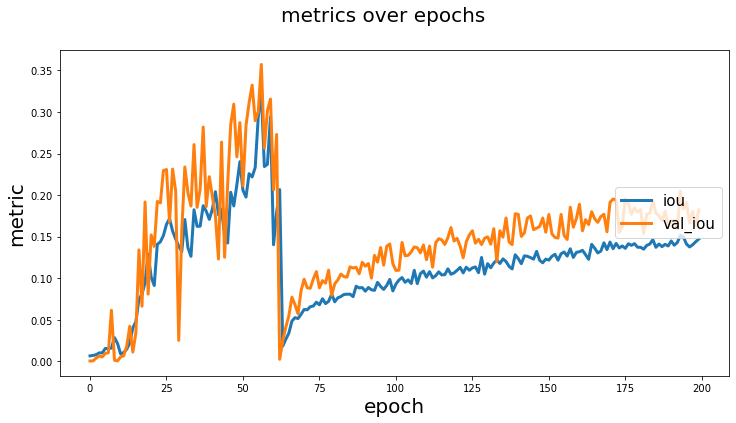

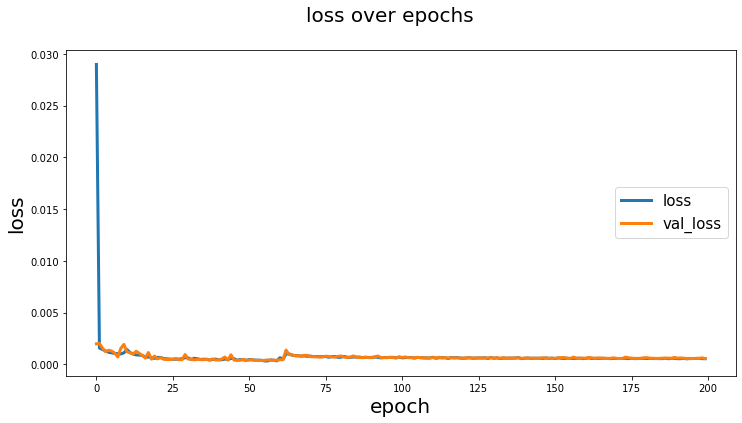

In [17]:
C.Helper.visualize_graph(history)

In [18]:
y_pred = C.Helper.prediction(X_test, model)

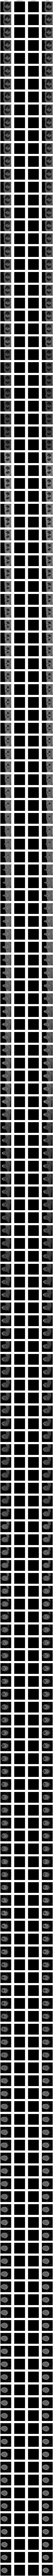

In [19]:
C.Helper.visualize_result(X_test, y_test, y_pred)

In [20]:
C.Helper.evaluate(X_test, y_test, model)

110/110 [==============================] - 24s 222ms/step - loss: 2.5810e-04 - iou: 0.0102 - iou_thresholded: 0.1408


In [21]:
# feed slice test full